##Link Dataset : https://www.kaggle.com/datasets/adityakadiwal/water-potability
##Kelas : C
##Kelompok : The Sukses
##1810511028 Albert Christian
##1910511002 Siti Khaalishah S
##1910511006 Fitria Adyati M
##1910511026 Weni Ariska
##1910511080 Hanif Radityo


In [ ]:
# import library
import pandas as pd
import time

# read data
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# missing value

# baca data
print(df.isnull().sum())

import numpy as np
avg_ph = df["ph"].astype("float").mean(axis=0)
df["ph"].replace(np.nan, avg_ph, inplace=True)

avg_sulfate = df["Sulfate"].astype("float").mean(axis=0)
df["Sulfate"].replace(np.nan, avg_sulfate, inplace=True)

avg_trihalo = df["Trihalomethanes"].astype("float").mean(axis=0)
df["Trihalomethanes"].replace(np.nan, avg_trihalo, inplace=True)

print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


CEK BALANCED DATA

In [ ]:
df.groupby('Potability').count()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,1998,1998,1998,1998,1998,1998,1998,1998,1998
1,1278,1278,1278,1278,1278,1278,1278,1278,1278


In [ ]:
kelas0 = 1998/3276
print("Kelas 0 =", "{:.2f}".format(kelas0*100), "%")

kelas1= 1278/3276
print("Kelas 1 =", "{:.2f}".format(kelas1*100), "%")

Kelas 0 = 60.99 %
Kelas 1 = 39.01 %


Data tidak seimbang sehingga dilakukan smote

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
X = df.iloc[:, 0:9]
Y = df["Potability"]

x_resampled, y_resampled = SMOTE(random_state=105).fit_resample(X,Y)

import numpy as np
c0 = np.count_nonzero(y_resampled == 0)
c1 = np.count_nonzero(y_resampled == 1)
print(c0)
print(c1)

1998
1998


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


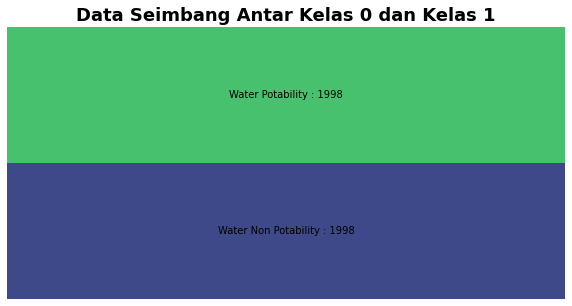

In [ ]:
!pip install squarify
import squarify
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

x = [c0,c1]

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 5)
squarify.plot(sizes=x, label=['Water Non Potability : 1998','Water Potability : 1998'])
plt.title("Data Seimbang Antar Kelas 0 dan Kelas 1",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()


In [ ]:
#Normalisasi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x_resampled)

In [ ]:
#Split Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rescaledX, y_resampled, test_size=0.2, random_state=105, 
                                                    stratify=y_resampled)

MODELING

In [ ]:
# model
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

AKURASI SEBELUM MEMAKAI METODE FORWARD SELECTION

In [ ]:
#Evaluasi klasifikasi Akurasi
from sklearn.metrics import accuracy_score
test_svm = model.predict(x_test)
akurasi = accuracy_score(y_test, test_svm)
print("Accuracy : ", akurasi)

#Evaluasi klasifikasi precision
from sklearn.metrics import precision_score
print("Precision : ",precision_score(y_test,test_svm))

#Evaluasi klasifikasi Recall
from sklearn.metrics import recall_score
print("Recall    : ", recall_score(y_test,test_svm))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n", confusion_matrix(y_test, test_svm))

Accuracy :  0.66625
Precision :  0.6535796766743649
Recall    :  0.7075
Confusion Matrix : 
 [[250 150]
 [117 283]]


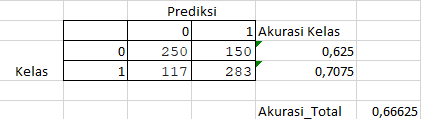

##DENGAN METODE FORWARD SELECTION

In [ ]:
x_train = pd.DataFrame(x_train, columns = X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)

n = len(list(X))
i=0
feature_set = []

for num_features in range(n):
  i = i+1
  print("iterasi =", i)
  metric_list = []
  for feature in x_train.columns:
    if feature not in feature_set:
      f_set = feature_set.copy()
      f_set.append(feature)
      print(f_set)
      model.fit(x_train[f_set], y_train)
      uji = model.predict(x_test[f_set])
      akurasi = accuracy_score(y_test, uji)
      print(akurasi)
      metric_list.append((akurasi, feature))

  metric_list.sort(key=lambda x : x[0], reverse = True)
  feature_set.append(metric_list[0][1])

iterasi = 1
['ph']
0.54375
['Hardness']
0.51875
['Solids']
0.50875
['Chloramines']
0.515
['Sulfate']
0.52125
['Conductivity']
0.49375
['Organic_carbon']
0.5375
['Trihalomethanes']
0.5225
['Turbidity']
0.48625
iterasi = 2
['ph', 'Hardness']
0.58875
['ph', 'Solids']
0.55
['ph', 'Chloramines']
0.575
['ph', 'Sulfate']
0.57625
['ph', 'Conductivity']
0.54625
['ph', 'Organic_carbon']
0.5475
['ph', 'Trihalomethanes']
0.54375
['ph', 'Turbidity']
0.5275
iterasi = 3
['ph', 'Hardness', 'Solids']
0.58375
['ph', 'Hardness', 'Chloramines']
0.5975
['ph', 'Hardness', 'Sulfate']
0.6275
['ph', 'Hardness', 'Conductivity']
0.56875
['ph', 'Hardness', 'Organic_carbon']
0.58375
['ph', 'Hardness', 'Trihalomethanes']
0.5775
['ph', 'Hardness', 'Turbidity']
0.55125
iterasi = 4
['ph', 'Hardness', 'Sulfate', 'Solids']
0.6325
['ph', 'Hardness', 'Sulfate', 'Chloramines']
0.68625
['ph', 'Hardness', 'Sulfate', 'Conductivity']
0.64375
['ph', 'Hardness', 'Sulfate', 'Organic_carbon']
0.64
['ph', 'Hardness', 'Sulfate', 'Tr

##AKURASI TERTINGGI SAAT DENGAN FITUR ['ph', 'Hardness', 'Sulfate', 'Chloramines', 'Solids']

## AKURASI = 0.6925

In [ ]:
# akurasi setelah forward selection
x_train_new = x_train[['ph', 'Hardness', 'Sulfate', 'Chloramines', 'Solids']]
x_test_new = x_test[['ph', 'Hardness', 'Sulfate', 'Chloramines', 'Solids']]

model.fit(x_train_new, y_train)
test_svm_forward = model.predict(x_test_new)
#Evaluasi klasifikasi Akurasi
from sklearn.metrics import accuracy_score
akurasi_forward = accuracy_score(y_test, test_svm_forward)
print("Accuracy : ", akurasi_forward)

#Evaluasi klasifikasi precision
from sklearn.metrics import precision_score
print("Precision : ",precision_score(y_test,test_svm_forward))

#Evaluasi klasifikasi Recall
from sklearn.metrics import recall_score
print("Recall    : ", recall_score(y_test,test_svm_forward))

#confusion matrix
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n", confusion_matrix(y_test, test_svm_forward))

Accuracy :  0.6925
Precision :  0.6742081447963801
Recall    :  0.745
Confusion Matrix : 
 [[256 144]
 [102 298]]


Akurasi Per Kelas

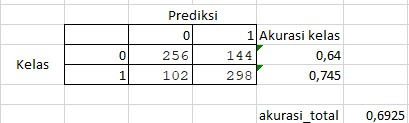